In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # statistical data visualization

#plotly is a library used to plot graphs in python

import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go

import os

# Display contents of the current directory.
print(os.listdir("."))


['about JM1 Dataset.txt', '.ipynb_checkpoints', 'jm1.arff', 'jm1.csv', 'bugPrediction.ipynb']


In [2]:
data = pd.read_csv('jm1.csv')

**Attribute Information for the Dataset**

1. loc : numeric % McCabe's line count of code
2. v(g) : numeric % McCabe "cyclomatic complexity"
3. ev(g) : numeric % McCabe "essential complexity"
4. iv(g) : numeric % McCabe "design complexity"
5. n : numeric % Halstead total operators + operands
6. v : numeric % Halstead "volume"
7. l : numeric % Halstead "program length"
8. d : numeric % Halstead "difficulty"
9. i : numeric % Halstead "intelligence"
10. e : numeric % Halstead "effort"
11. b : numeric % Halstead
12. t : numeric % Halstead's time estimator
13. lOCode : numeric % Halstead's line count
14. lOComment : numeric % Halstead's count of lines of comments
15. lOBlank : numeric % Halstead's count of blank lines
16. lOCodeAndComment : numeric
17. uniq_Op : numeric % unique operators
18. uniq_Opnd : numeric % unique operands
19. total_Op : numeric % total operators
20. total_Opnd : numeric % total operands
21. branchCount : numeric % of the flow graph
22. defects : {false,true} % module has/has not one or more reported defects

In [3]:
data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
loc                  10885 non-null float64
v(g)                 10885 non-null float64
ev(g)                10885 non-null float64
iv(g)                10885 non-null float64
n                    10885 non-null float64
v                    10885 non-null float64
l                    10885 non-null float64
d                    10885 non-null float64
i                    10885 non-null float64
e                    10885 non-null float64
b                    10885 non-null float64
t                    10885 non-null float64
lOCode               10885 non-null int64
lOComment            10885 non-null int64
lOBlank              10885 non-null int64
locCodeAndComment    10885 non-null int64
uniq_Op              10885 non-null object
uniq_Opnd            10885 non-null object
total_Op             10885 non-null object
total_Opnd           10885 non-null object
branchCount          10

In [4]:
data.head() #shows first 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [5]:
data.tail() #shows last 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False
10884,19.0,3.0,1.0,1.0,58.0,272.63,0.09,11.57,23.56,3154.67,...,13,0,2,1,12,14,31,27,5,False


In [6]:
data.sample(10) #shows random rows (sample(number_of_rows))

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
2432,23.0,3.0,1.0,3.0,39.0,176.42,0.11,9.10,19.39,1605.41,...,14,3,3,0,13,10,25,14,5,False
617,55.0,6.0,4.0,4.0,158.0,816.85,0.03,36.14,22.60,29523.23,...,37,12,3,1,22,14,112,46,10,True
4332,30.0,8.0,4.0,4.0,127.0,697.47,0.04,25.35,27.52,17679.23,...,25,0,3,0,22,23,74,53,15,False
4527,24.0,2.0,1.0,1.0,62.0,301.19,0.09,10.97,27.46,3303.73,...,13,1,8,0,13,16,35,27,3,False
2515,39.0,14.0,11.0,4.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,27,False
6277,22.0,7.0,6.0,4.0,98.0,506.65,0.04,23.75,21.33,12033.00,...,13,0,6,0,20,16,60,38,13,False
6750,143.0,15.0,1.0,14.0,463.0,2626.33,0.02,53.20,49.37,139720.91,...,123,10,7,0,21,30,311,152,29,False
4153,28.0,3.0,1.0,3.0,66.0,332.93,0.10,9.75,34.15,3246.07,...,19,0,5,2,13,20,36,30,5,False
4350,5.0,1.0,1.0,1.0,15.0,51.89,0.25,4.00,12.97,207.57,...,3,0,0,0,8,3,12,3,1,False
6243,7.0,1.0,1.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,False


In [7]:
data.shape #shows the number of rows and columns

(10885, 22)

In [8]:
'''25% refers to the percentile that is min + (max-min)*0.25. Where min is the value of the data'''
data.describe() #shows simple statistics (min, max, mean, etc.)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


In [9]:
'''Groupby groups the datapoints having same value of an attribute together. It creates a groupby object.'''
defects_true_false = data.groupby('defects')['b'].apply(lambda x: x.count()) #defect rates (true/false)
print('False : ' , defects_true_false[0])
print('True : ' , defects_true_false[1])

False :  8779
True :  2106


**Histogram Plot**

In [10]:
trace = go.Histogram(
    x = data.defects,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

**Covariance**

Covariance is a meausure of the similarity of two given featrues. It's lies between -1 and 1. For features with positive covariance, increasing the value of 1 would result in an increase in the value of the other whereas decreasing the value of one of the feature would lead to decreasing of the value of the other feature. However, the values move in opposite directions for features having negative covariance.

In [11]:
data.corr() #shows coveriance matrix

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,defects
loc,1.000000,0.817757,0.517551,0.784057,0.881795,0.900293,-0.286587,0.689543,0.499946,0.750564,0.899965,0.750564,0.921918,0.612858,0.803573,0.278119,0.245388
v(g),0.817757,1.000000,0.701710,0.859590,0.730781,0.759881,-0.252902,0.669057,0.303031,0.709501,0.759635,0.709501,0.799915,0.384506,0.538366,0.209811,0.208644
ev(g),0.517551,0.701710,1.000000,0.639574,0.465992,0.445902,-0.233982,0.434009,0.213211,0.315538,0.445693,0.315538,0.454604,0.294208,0.338243,0.190911,0.172973
iv(g),0.784057,0.859590,0.639574,1.000000,0.702415,0.743193,-0.197736,0.575369,0.309717,0.757702,0.743013,0.757702,0.775873,0.351583,0.541296,0.207028,0.181984
n,0.881795,0.730781,0.465992,0.702415,1.000000,0.984276,-0.240749,0.808113,0.651209,0.716536,0.983938,0.716536,0.944383,0.596374,0.798561,0.284391,0.204143
v,0.900293,0.759881,0.445902,0.743193,0.984276,1.000000,-0.198104,0.752206,0.598743,0.800000,0.999696,0.800000,0.962078,0.576844,0.792330,0.266537,0.189136
l,-0.286587,-0.252902,-0.233982,-0.197736,-0.240749,-0.198104,1.000000,-0.347215,-0.166801,-0.062026,-0.196147,-0.062026,-0.218373,-0.165885,-0.223670,-0.106117,-0.164917
d,0.689543,0.669057,0.434009,0.575369,0.808113,0.752206,-0.347215,1.000000,0.398162,0.574298,0.751835,0.574298,0.768188,0.502121,0.637211,0.253793,0.169629
i,0.499946,0.303031,0.213211,0.309717,0.651209,0.598743,-0.166801,0.398162,1.000000,0.209268,0.598341,0.209268,0.563920,0.392551,0.572352,0.217810,0.192831
e,0.750564,0.709501,0.315538,0.757702,0.716536,0.800000,-0.062026,0.574298,0.209268,1.000000,0.799868,1.000000,0.809070,0.384806,0.600649,0.148693,0.086036


**Heatmap**

A heatmap is a more intuitive way of representing the covariance matrix wherein colors are used to indicate the co-variance between two features. The light color in the map indicates that the co-variance is high whereas the dark color indicates that the co-variance is low.

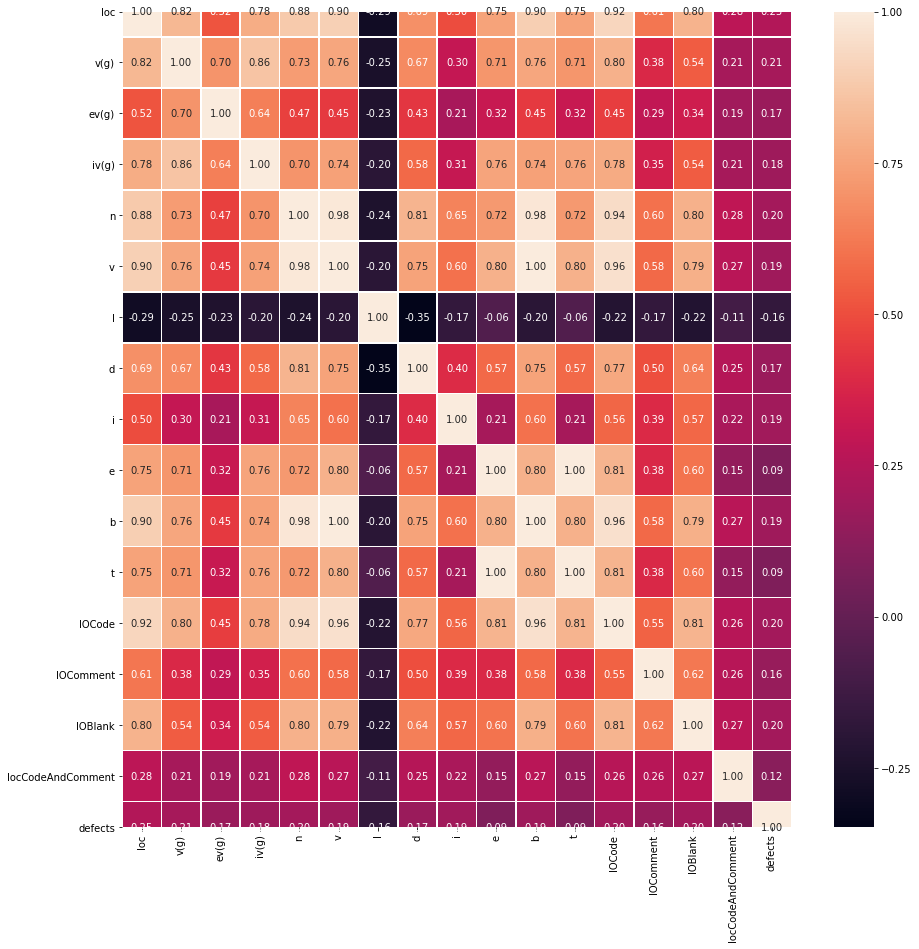

In [12]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

**Scatter Plot**

In [13]:
trace = go.Scatter(
    x = data.v,
    y = data.b,
    mode = "markers",
    name = "Volume - Bug",
    marker = dict(color = 'darkblue'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Volume - Bug',
              xaxis = dict(title = 'Volume', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

**Data Preprocessing**

Need to find out whether there are certain empty entries present in the dataset, if yes then need to clean the data if no, we're okay to go.

In [14]:
data.isnull().sum() #shows how many of the null

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

**Outlier Detection**

A box plot is used for outlier detection. It displays 5 statistics of the dataset namely min, 1st quartile, median, 3rd quartile and the max.

In [15]:
trace1 = go.Box(
    x = data.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)

**Feature Extractotion**

We'd separate data points which have unusually high values (high complexity) for the attributes n, v, d, e, and t. We'd label these as "Redesign" whereas we'd label the others as "Successful". We're performing an evaluation of the data and would append the extra column 'complexityEvaluation' to our dataFrame object.

In [16]:
def evaluation_control(data):    
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]
    
evaluation_control(data)
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,Succesful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,True,Succesful
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,10,8,1,17,36,112,86,13,True,Redesign
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,29,28,2,17,135,329,271,5,True,Redesign
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,1,6,0,11,16,76,50,7,True,Succesful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,2,0,10,15,30,22,7,False,Succesful
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,2,0,12,8,19,11,3,False,Succesful
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,1,10,0,18,15,59,44,7,False,Succesful
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,2,0,9,8,21,15,1,False,Succesful


In [17]:
data.info() # Update, added a new column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 23 columns):
loc                     10885 non-null float64
v(g)                    10885 non-null float64
ev(g)                   10885 non-null float64
iv(g)                   10885 non-null float64
n                       10885 non-null float64
v                       10885 non-null float64
l                       10885 non-null float64
d                       10885 non-null float64
i                       10885 non-null float64
e                       10885 non-null float64
b                       10885 non-null float64
t                       10885 non-null float64
lOCode                  10885 non-null int64
lOComment               10885 non-null int64
lOBlank                 10885 non-null int64
locCodeAndComment       10885 non-null int64
uniq_Op                 10885 non-null object
uniq_Opnd               10885 non-null object
total_Op                10885 non-null object
total_Opn

In [18]:
data.groupby("complexityEvaluation").size() #complexityEvalution rates (Succesfull/redesign)

complexityEvaluation
Redesign     1725
Succesful    9160
dtype: int64

In [19]:
# Histogram
trace = go.Histogram(
    x = data.complexityEvaluation,
    opacity = 0.75,
    name = 'Complexity Evaluation',
    marker = dict(color = 'darkorange')
)
hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Complexity Evaluation',
                   xaxis = dict(title = 'Succesful - Redesign'),
                   yaxis = dict(title = 'Frequency')
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

**Data Normalization (min-max normalization)**

- Base on the details of the data.describe(), we can identify the features which need normalization. Normalization needed in order to speed up the learning algorithms.

In [20]:
'''Observe new values of b and v in the data.describe()'''

from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000016,0.048237
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,True,Succesful,0.000012,0.037106
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1,17,36,112,86,13,True,Redesign,0.014029,0.014100
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,2,17,135,329,271,5,True,Redesign,0.053793,0.053803
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,0,11,16,76,50,7,True,Succesful,0.007411,0.007421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,10,15,30,22,7,False,Succesful,0.002987,0.002968
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,12,8,19,11,3,False,Succesful,0.001604,0.001484
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,0,18,15,59,44,7,False,Succesful,0.006427,0.006308
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,9,8,21,15,1,False,Succesful,0.001820,0.001855


In [21]:
scaled_data = pd.concat([data.v, data.b, data.v_ScaledUp, data.b_ScaledUp], axis = 1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000016,0.048237
1,1.00,1.00,0.000012,0.037106
2,1134.13,0.38,0.014029,0.014100
3,4348.76,1.45,0.053793,0.053803
4,599.12,0.20,0.007411,0.007421
...,...,...,...,...
10880,241.48,0.08,0.002987,0.002968
10881,129.66,0.04,0.001604,0.001484
10882,519.57,0.17,0.006427,0.006308
10883,147.15,0.05,0.001820,0.001855


**Model Selection**

- This is a classification problem, thus many learning algorithms can be employed to achieve our purpose such as 
    1. Naive Bayes Classifier
    2. Logistic Regression
    3. Support Vector Machines
    ...

**Naive Bayes Classifier**

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 25 columns):
loc                     10885 non-null float64
v(g)                    10885 non-null float64
ev(g)                   10885 non-null float64
iv(g)                   10885 non-null float64
n                       10885 non-null float64
v                       10885 non-null float64
l                       10885 non-null float64
d                       10885 non-null float64
i                       10885 non-null float64
e                       10885 non-null float64
b                       10885 non-null float64
t                       10885 non-null float64
lOCode                  10885 non-null int64
lOComment               10885 non-null int64
lOBlank                 10885 non-null int64
locCodeAndComment       10885 non-null int64
uniq_Op                 10885 non-null object
uniq_Opnd               10885 non-null object
total_Op                10885 non-null object
total_Opn

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

'''We are now selecting the data which we need for our model. For now, the data selected
    is all the columns'''
X = data.iloc[:,:-10].values
Y = data.complexityEvaluation.values # Select classification attribute values
Y

array(['Succesful', 'Succesful', 'Redesign', ..., 'Succesful',
       'Succesful', 'Succesful'], dtype=object)

In [32]:
# Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y,test_size = validation_size, random_state = seed)


(8708,)

In [33]:
# Creation of Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [35]:
# Calculation of the ACC value by the K-fold cross validation of NB model
scoring = 'accuracy'
k_fold = model_selection.KFold(n_splits = 10, random_state = seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = k_fold, scoring = scoring)
cv_results

array([0.98507463, 0.98277842, 0.9793341 , 0.97014925, 0.98163031,
       0.9793341 , 0.98392652, 0.9793341 , 0.98045977, 0.97586207])

In [36]:
msg = "Mean :%f - std : (%f)"%(cv_results.mean(),cv_results.std())
msg

'Mean :0.979788 - std : (0.004084)'

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

    Redesign       0.93      0.94      0.94       319
   Succesful       0.99      0.99      0.99      1858

    accuracy                           0.98      2177
   macro avg       0.96      0.97      0.96      2177
weighted avg       0.98      0.98      0.98      2177

[[ 301   18]
 [  22 1836]]
ACC:  0.9816260909508497
